### Student Information
Name: 陳麗光 Li-Kuang Chen

Student ID: 109065704

GitHub ID: LKChenLK

Kaggle name: likuangchen (team name: oao)

Kaggle private scoreboard snapshot:

![Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

In [2]:
### Begin Assignment Here

## Part 1

### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [105]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count_vect = CountVectorizer()
train_cnt = count_vect.fit_transform(train_df.text)
test_cnt = count_vect.fit_transform(test_df.text)

In [107]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
tf_train = []
tf_test = []

for j in range(0,train_cnt.shape[1]):
    tf_train.append(sum(train_cnt[:,j].toarray()))
tf_train = np.asarray(train_cnt.sum(axis=0))[0]    

for j in range(0,test_cnt.shape[1]):
    tf_test.append(sum(test_cnt[:,j].toarray()))
tf_test = np.asarray(test_cnt.sum(axis=0))[0]

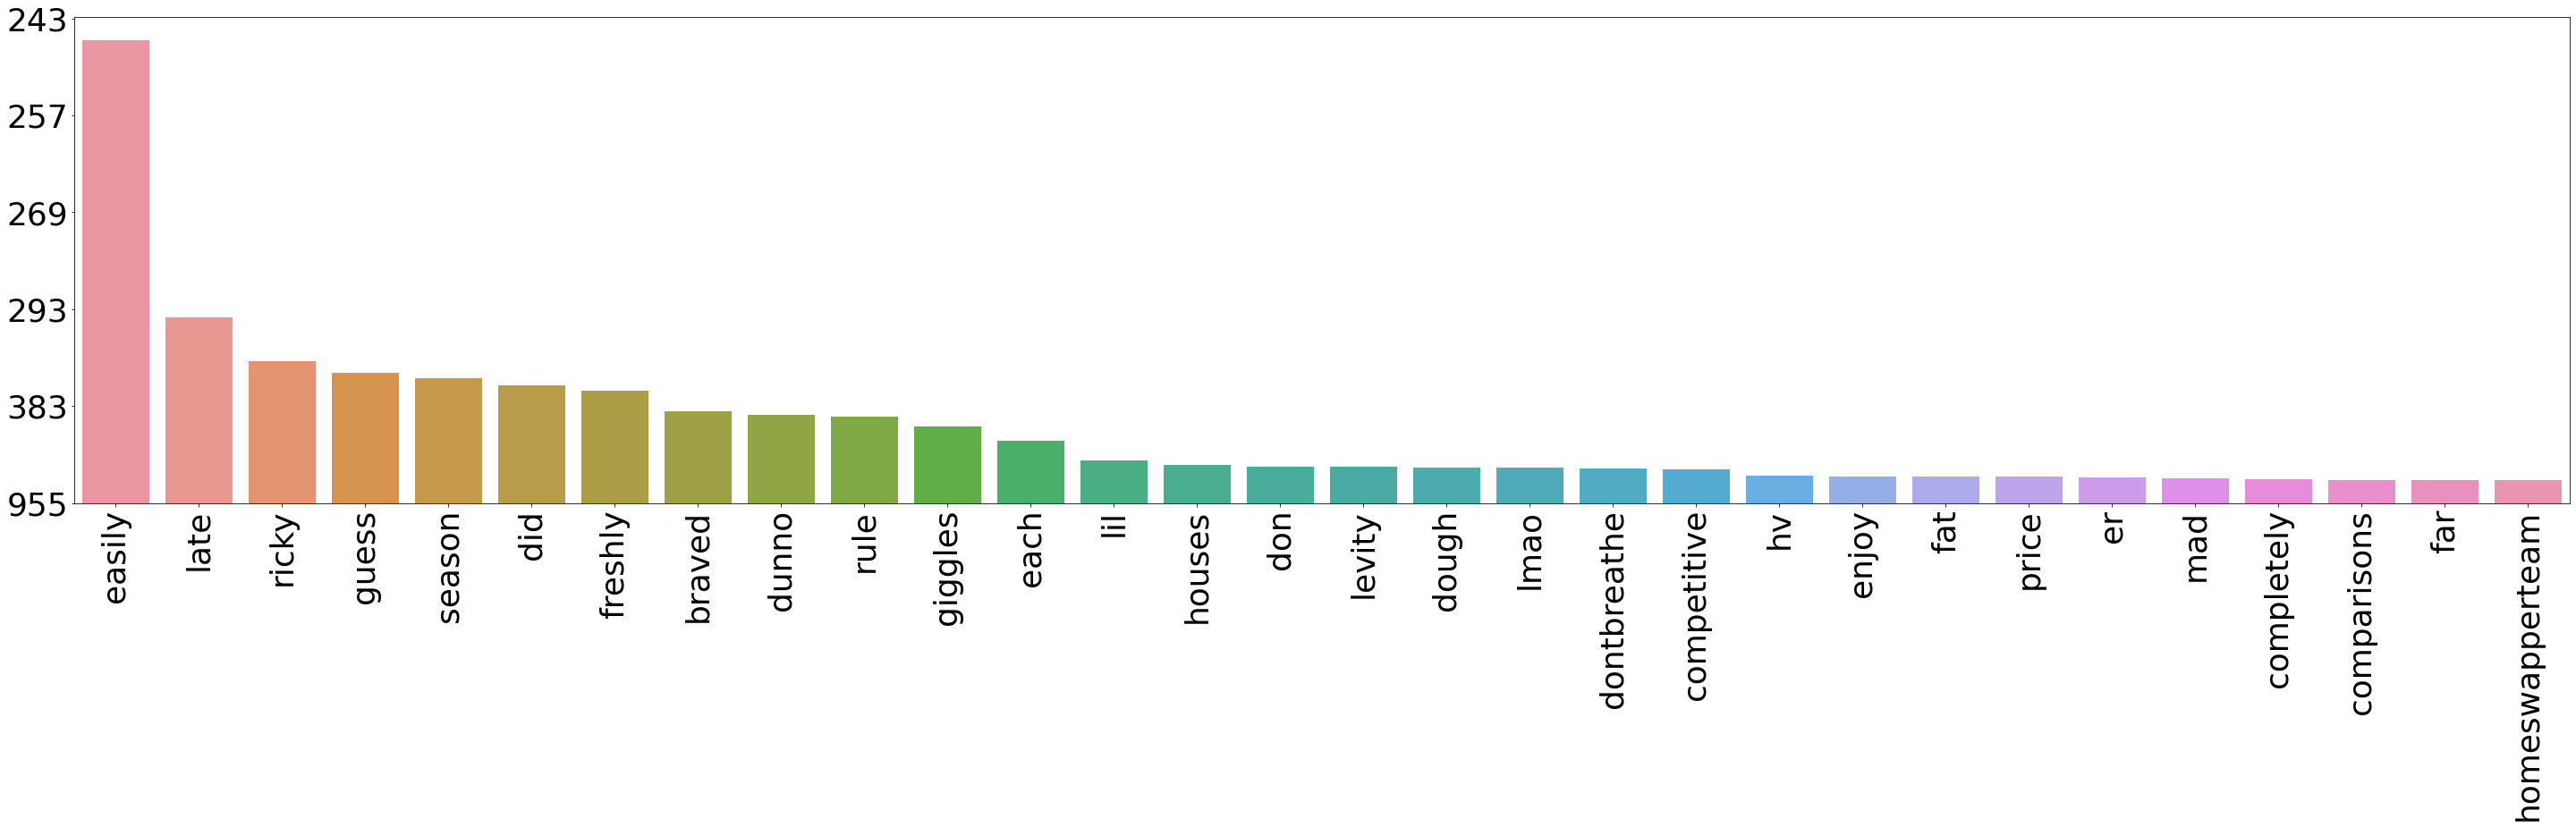

In [116]:
import seaborn as sns
# Answer here
feature_tf_train = list(zip(count_vect.get_feature_names(), tf_train))
train_tf_sorted = sorted(feature_tf_train, key=lambda tp: tp[1], reverse=True)


plt.subplots(figsize=(50, 10))
top_30_terms_train = [ tp[0] for tp in train_tf_sorted[:30] ]
top_30_freqs_train = [ tp[1] for tp in train_tf_sorted[:30] ]
g = sns.barplot(x=top_30_terms_train, y=top_30_freqs_train)

g.set_xticklabels( top_30_terms_train , rotation = 90, fontsize=36);
g.set_yticklabels( top_30_freqs_train , fontsize=36);

Above: Word frequency for top 30 words in training set

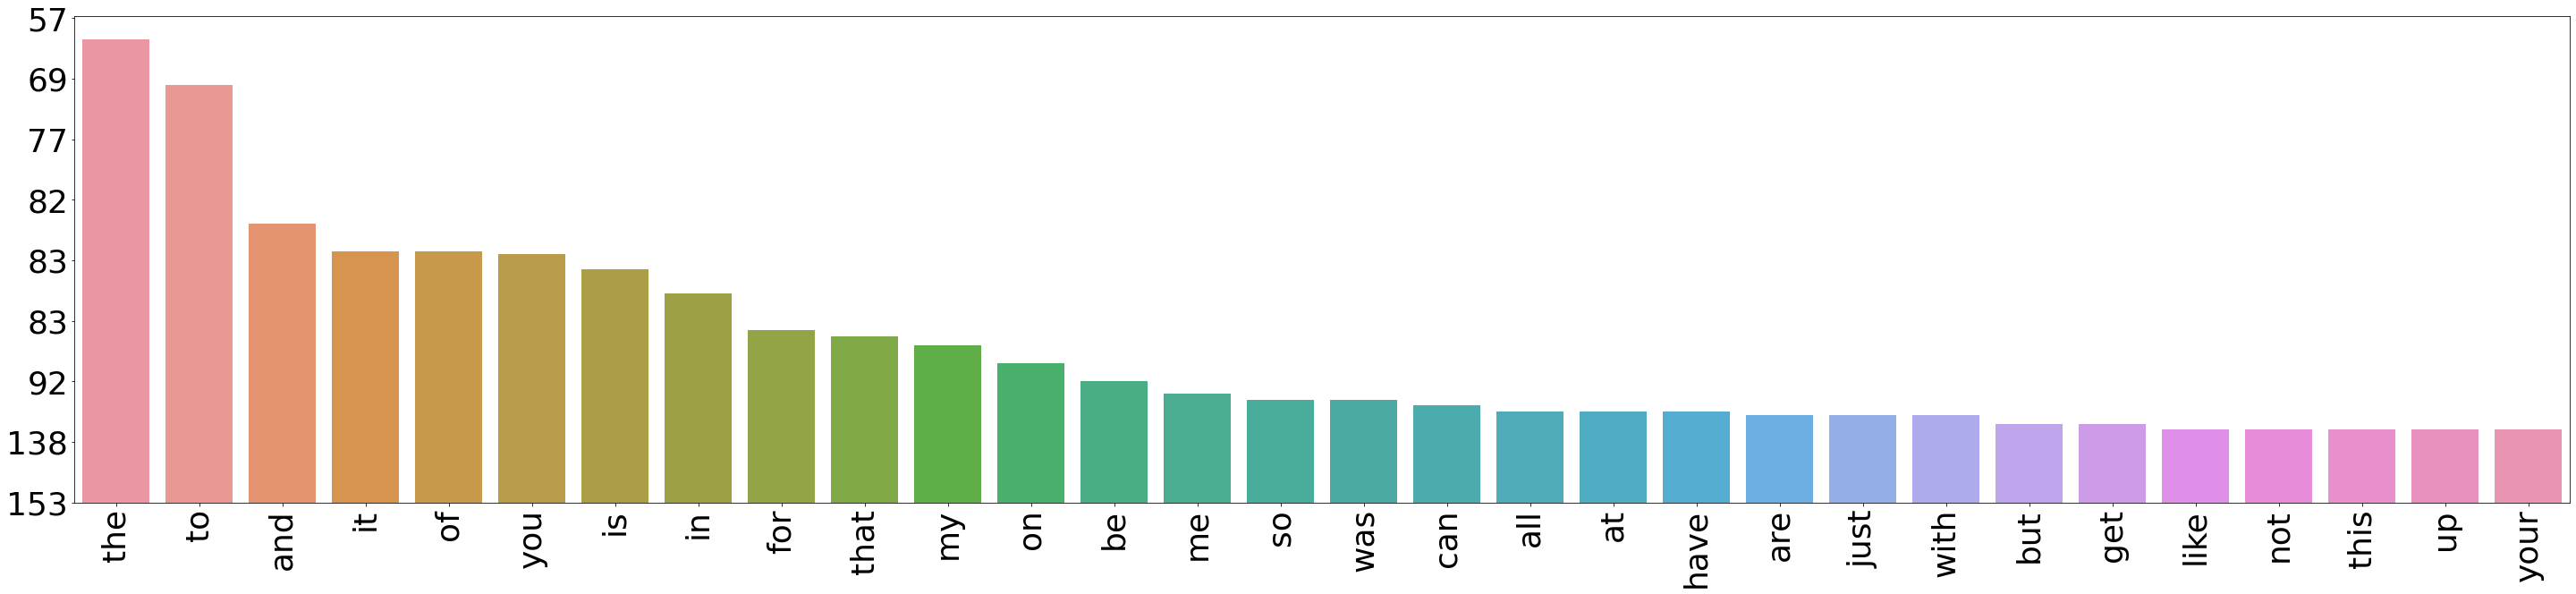

In [115]:
feature_tf_test = list(zip(count_vect.get_feature_names(), tf_test))
test_tf_sorted = sorted(feature_tf_test, key=lambda tp: tp[1], reverse=True)


plt.subplots(figsize=(50, 10))
top_30_terms_test = [ tp[0] for tp in test_tf_sorted[:30] ]
top_30_freqs_test = [ tp[1] for tp in test_tf_sorted[:30] ]
g = sns.barplot(x=top_30_terms_test, y=top_30_freqs_test)

g.set_xticklabels( top_30_terms_test , rotation = 90, fontsize=36);
g.set_yticklabels( top_30_freqs_test , fontsize=36);

Above: Word frequency for top 30 words in test set  
Observation: since stopwords are not removed for the test set, they emerge as words with the most counts.

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()
X = tfidf_vec.fit_transform(train_df.text)
tfidf_vec.get_feature_names_out()[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

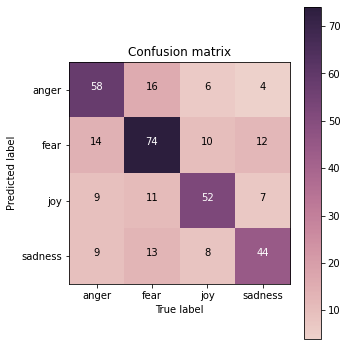

In [24]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

In [61]:
23+44

67

While the result above might seem like "fear" is the most accurate class of all classes being classified, it is misleading because the number of tweets in each class is not balanced. The number of tweets in each class:  



anger: 90  
fear: 114  
joy: 76  
sadness: 67

A better way to look at the results would be to divide each class by the number of tweet each has in the true labels, and then look at the correctly- and incorrectly-classified tweets.

The results show that the most misclassified class for "anger" is "fear", where 14 out of 90 tweets that should be "anger" are misclassified as "fear". Similarly, out of 114 tweets, 

In [68]:
# Answer here
def normalize_cm(confusion_matrix):
    normalised = []
    for row in confusion_matrix:
        row_sum = sum(row)
        norm_cm = row/row_sum
        normalised.append(norm_cm)
    return np.array(normalised)

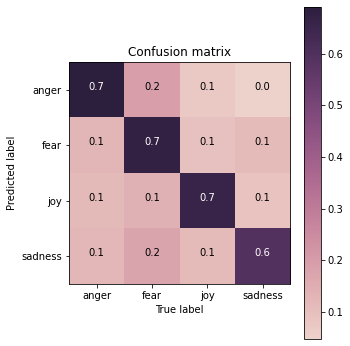

In [69]:
normalised_cm = normalize_cm(cm)
plot_confusion_matrix(normalised_cm, classes=my_tags, title='Confusion matrix')

From the above normalised confusion matrix, we can see that 
- the classes "anger", "fear", and "joy" are equally well-classified, with an accuracy of 0.7. 
- "Sadness" and "anger" have a slightly higher tendency to be misclassified as "fear". 
- "Sadness" is slightly easier to be misclassified as other emotions, it has an accuracy of 0.6.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

---
### Using word count (frequencies) as features
Since frequency count is discrete and has more than just 0 and 1, the multinomial Naive Bayes classifier is suitable for this task.  
(documentation: "[The multinomial NB classifier] suitable for classification with discrete features (e.g., word counts for text classification)")

In [12]:
from sklearn.naive_bayes import MultinomialNB
multi_clfr = MultinomialNB()

In [48]:
# Using CountVectorizer for term frequencies
X_counts = count_vect.fit_transform(X.sentences) 

In [50]:
# split data into training- and test-sets
X_train, X_test, y_train, y_test = train_test_split(
    X_counts.toarray(), X.scores, test_size=0.33, random_state=42)

In [51]:
multi_clfr.fit(X_train, y_train) # data, classes
print(multi_clfr.score(X_test, y_test))

0.8100102145045965


### Evaluate with 5-fold validation

In [285]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
kf.get_n_splits(X_counts)

5

In [286]:
X_counts_acc = []

for train_index, test_index in kf.split(X_counts):
    X_train, X_test, y_train, y_test = train_test_split(
        X_counts.toarray(), X.scores, test_size=0.33, random_state=42)
    multi_clfr.fit(X_train, y_train) # data, classes
    X_counts_acc.append(multi_clfr.score(X_test, y_test))

In [287]:
np.mean(X_counts_acc)

0.8100102145045966

Above is the **accuracy** of classifying sentiments based on term frequency. 

---
### Using tf-idf as features
Since tf-idf values are continuous, the Gaussian Naive Bayes classifier is more suitable.

In [13]:
from sklearn.naive_bayes import GaussianNB
gauss_clf = GaussianNB()

In [86]:
# since we're not using review websites as categories, I just use X.sentences (no additional website label)
X_tfidf_nocat = tfidf_vectorizer.fit_transform(X.sentences)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf_nocat.toarray(), X.scores, test_size=0.33, random_state=42)

In [88]:
gauss_clf.fit(X_train, y_train)
print(gauss_clf.score(X_test, y_test))

0.693564862104188


In [288]:
kf = KFold(n_splits=5)
kf.get_n_splits(X_tfidf_nocat)

5

In [289]:
X_tfidf_acc = []

for train_index, test_index in kf.split(X_tfidf_nocat):
    X_train, X_test, y_train, y_test = train_test_split(
        X_tfidf_nocat.toarray(), X.scores, test_size=0.33, random_state=42)
    gauss_clf.fit(X_train, y_train) # data, classes
    X_tfidf_acc.append(gauss_clf.score(X_test, y_test))

In [290]:
np.mean(X_tfidf_acc)

0.693564862104188

Above is the accuracy using TF-IDF as features and a Gaussian Naive Bayes classifier to classify the emotions. 

- These experiments show that term frequency is a better feature representation than TF-IDF. 

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Answer here
The decision tree model has a test accuracy of 0.66. It is low compared to the Naive Bayes classifier. The reason might be that decision tree is easier to overfit to the training set.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss. How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

In [97]:
epochs = training_log['epoch']
acc = training_log['accuracy']
loss = training_log['loss']
val_acc = training_log['val_accuracy']
val_loss = training_log['val_loss']

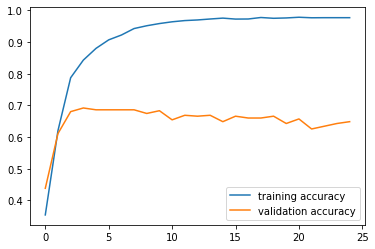

In [102]:
fig, ax = plt.subplots()
line1, = ax.plot(epochs, acc, label='training accuracy')
line2, = ax.plot(epochs, val_acc, label='validation accuracy')

ax.legend()

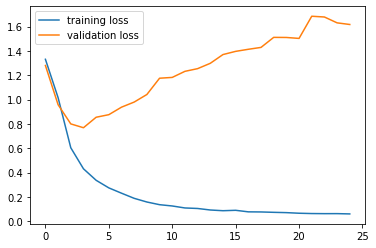

In [103]:
fig, ax = plt.subplots()
line1, = ax.plot(epochs, loss, label='training loss')
line2, = ax.plot(epochs, val_loss, label='validation loss')

ax.legend()

### Answer here
How are they related to the concept of overfitting/underfitting covered in class?
- The accuracy of training monotonically increases while its loss monotonically decreases. This is because the model tries to make predictions as close the the training set as possible. 
- However, when the model fits itself too close to the training set, it will start to overfit, meaning that it specialises too much on being accurate to the training set but fails to generalise to the test set, or the "whole picture"/the whole dataset in general. This is exemplified by the validation accuracy not being as high as the training accuracy, and the validation loss increasing only after around 4 epochs. 

---
!!! ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


### Answer here
- One way would be to add up the word vectors in a sentence so they become a sentence representation. 
- However, more advanced models that are take sentence structures into consideration during training do exist. 
    - For example, since BERT (Devlin, J., Chang, M. W., Lee, K., & Toutanova, K. (2018)) is trained with sentences tokenised as a sequence of words, it is able to better "understand" sentences than representations of words put together. 
    - Another example of a model is Sentence-BERT (Reimers, N. and Gurevych, I. (2019)), which can encode return an embedding for a sentence, which can be used for calculating similarity between sentences. 

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [126]:

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

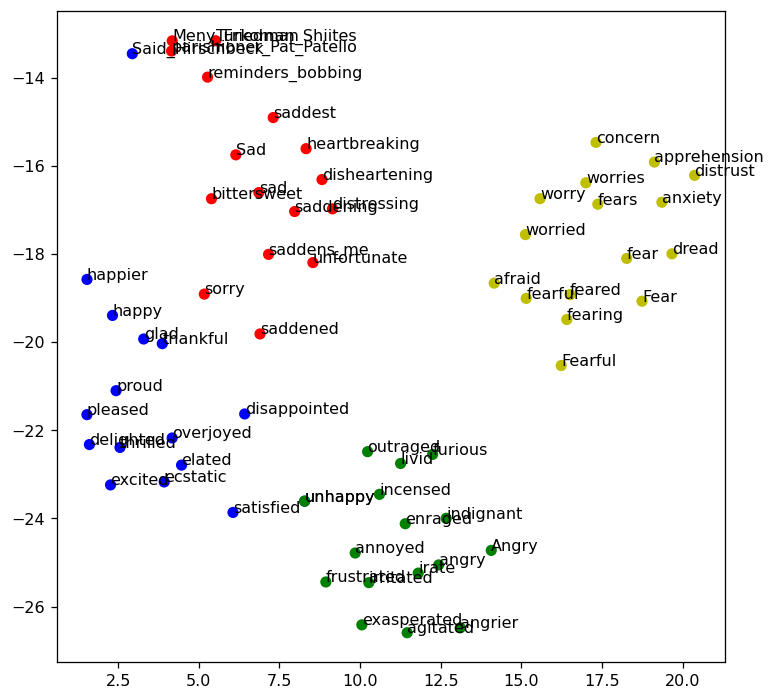

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
#all_word = list(model.vocab.keys())
all_word = list(model.key_to_index.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

### Comment
This t-SNE representation visualises the relationship among the semantics of the words in each category quite nicely. Observing the data, a few things can be noticed:

- There are several data points that seem to be in the wrong class, such as "disappointed", which is in the same group of words that are most similar to "happy".  

- There are also a few unrelated words/names that got in as "most similar" words as "sad", such as "reminders_bobbing", "Turkoman_Shiites", and "Meny_Friedman", and "Said_Hirschbeck" also appears in the "happy" group.

- It seems that word2vec distinguishes capitalisation, so "Sad" and "sad", "Angry" and "angry" , "Fear" and "fear" are each counted as different vectors with different embedding values. 

- "unhappy" is included by both the "angry" group and the "happy" group. This is perhaps because they are used under similar contexts. 

---
## Part 2
The screenshot of the leaderboard is shown at the beginning of this notebook (scroll to top to see).
## Part 3
A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 

### A summary
Methods I've tried:
1. BOW and BOW-500 as features 
    - clasification methods include decision tree and Naive Bayes
    - results are mediocre: accuracy is around 0.42 for the Bernoulli Naive Bayes classifier, which produced the best result out of the 3 classifiers.
2. Method from the SemEval2018 winner
3. BERT for sequence classification

### Preprocessing
The preprocessing is done in 2 parts:
1. Manual data-cleaning: removing "&lt;LH&gt;"
2. The `ekphrasis` package:
    - This is a package that deals specifically with twitter data. It can 
        - do spelling correction
        - remove and replace hashtag and username 
        - replace emoticons with corresponding textual representations (e.g. :-D => happy)
        - replace noise such as  urls, email addresses, numbers (percentage, phone numbers, money, time, date) with corresponding tags

#### [Preprocessing] Reading the files + manual cleaning

In [18]:
import json, csv, jsonlines
from tqdm import tqdm

In [26]:
test_train_ids = dict()

with open("lab2-data/data_identification.csv") as f:
    spamreader = csv.reader(f, delimiter=',', quotechar='|')
    for row in spamreader:
        id_, label = row[0], row[1]
        test_train_ids[id_] = label

In [27]:
train_labels = dict()
with open("lab2-data/emotion.csv") as f:
    spamreader = csv.reader(f, delimiter=',', quotechar='|')
    for row in spamreader:
        train_labels[row[0]] = row[1] #id: label

In [4]:
tweets = []
with jsonlines.open("lab2-data/tweets_raw.json") as reader:
    for obj in reader:
        tweets.append(obj['_source']['tweet'])

In [7]:
tweets_new = tweets.copy()
for idx, it in tqdm(enumerate(tweets)):
    text = it['text'].split("<LH>")
    new_text = " ".join(text)
    #new_text = " ".join(new_text.split("#"))
    tweets_new[idx]['text'] = new_text

1867535it [00:04, 375815.85it/s]


In [8]:
with jsonlines.open('lab2-data/tweets.jsonl', mode='w') as writer:
    writer.write(tweets_new)

In [75]:
emotions = set()

for it in train_labels.values():
    emotions.add(it)

In [47]:
emotions = {'anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust'}

#### [Preprocessing] Cleaning with `ekphrasis`

In [10]:
# source: https://github.com/cbaziotis/ekphrasis
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['url', 'email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
#     annotate={"hashtag", "allcaps", "elongated", "repeated",
#         'emphasis', 'censored'},
    annotate={},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=True,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

/Users/melody/Documents/Courses 2021 autumn/Data Mining/labs/lib/python3.9/site-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


/Users/melody/Documents/Courses 2021 autumn/Data Mining/labs/lib/python3.9/site-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [11]:
# examples
sentences = [
    "CANT WAIT for the new season of #TwinPeaks ＼(^o^)／!!! #davidlynch #tvseries :)))",
    "I saw the new #johndoe movie and it suuuuucks!!! WAISTED $10... #badmovies :/",
    "@SentimentSymp:  can't wait for the Nov 9 #Sentiment talks!  YAAAAAAY !!! :-D http://sentimentsymposium.com/.",
    'Happy Birthday @KeyshiaCole #OneIfTheGreats  #Amazing💖'
]

for s in sentences:
    print(" ".join(text_processor.pre_process_doc(s)))

cant wait for the new season of twin peaks ＼(^o^)／ ! ! ! david lynch tv series <happy>
i saw the new john doe movie and it suuuuucks ! ! ! waisted <money> . . . bad movies <annoyed>
<user> : can not wait for the <date> sentiment talks ! yaaaaaay ! ! ! <laugh> <url>
happy birthday <user> one if the greats amazing 💖


In [12]:
preprocessed_tweets = tweets_new.copy()

for idx, it in tqdm(enumerate(tweets_new)):
    preproc_text = text_processor.pre_process_doc(it['text'])
    preprocessed_tweets[idx]['text'] = preproc_text

1867535it [07:42, 4038.64it/s]


In [13]:
with jsonlines.open('lab2-data/tweets_preprocessed_notags.jsonl', mode='w') as writer:
    writer.write(preprocessed_tweets)

In [2]:
preprocessed_tweets = []
with jsonlines.open('lab2-data/tweets_preprocessed_notags.jsonl') as reader:
    for obj in reader:
        preprocessed_tweets.append(obj)
preprocessed_tweets = preprocessed_tweets[0]

In [70]:
preprocessed_tweets = preprocessed_tweets[0]

In [23]:
preprocessed_tweets[0]

{'hashtags': ['Snapchat'],
 'tweet_id': '0x376b20',
 'text': ['people',
  'who',
  'post',
  '"',
  'add',
  'me',
  'on',
  'snapchat',
  '"',
  'must',
  'be',
  'dehydrated',
  '.',
  'cuz',
  'man',
  '.',
  '.',
  '.',
  '.',
  'that',
  "'",
  's']}

In [29]:
id_tweets = dict()
for it in preprocessed_tweets:
    id_tweets[it['tweet_id']] = it['text']

In [42]:
train_data = dict()

for id_, label in tqdm(train_labels.items()):
    if id_[0].isalpha():
        continue
    train_data[id_] = [" ".join(id_tweets[id_]), label]

100%|███████████████████████████████████████████████████████████████████████| 1455564/1455564 [00:21<00:00, 67146.07it/s]


In [51]:
with open("train_new.txt", 'a') as f:
    for id_, stuff in train_data.items():
        to_write = id_+"\t"+stuff[0]+"\t"+stuff[1]+"\n"
        f.write(to_write)
        #f.write(id_ + "\t" + "\t".join(stuff) + "\n")

In [58]:
X_train = []
y_train = []
with open("train_orig.txt") as f:
    line = f.readline()
    while line:
        X_train.append(line.split("\t")[1])
        y_train.append(line.split("\t")[2].strip())
        line = f.readline()

In [83]:
len(y_train)

1091672

#### Splitting the data
In order to evaluate the effects of my own methods and to be able to analyse the results, I further split the training set into a a subset of training set and a validation set. 

In [54]:
from sklearn.model_selection import train_test_split

In [59]:
# further split training data into validation and train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.25,
                                                    stratify=y_train,
                                                    random_state=42)

In [60]:
y_train[0]

'trust'

In [61]:
with open('train_new.txt', 'a') as f:
    for i in range(len(X_train)):
        f.write(X_train[i]+"\t"+y_train[i]+"\n")
# load when needed

In [62]:
with open('val_new.txt', 'a') as f:
    for i in range(len(X_val)):
        f.write(X_val[i]+"\t"+y_val[i]+"\n")
# load when needed

In [78]:
with open('test_with_id.txt', 'a') as f:
    for i in range(len(X_test)):
        f.write(X_test[i]+"\n")
# load when needed

In [11]:
with open("test_with_id.txt") as f:
    line = f.readline()
    X_test = []
    test_ids = []
    while line:
        X_test.append(line.split("\t")[0])
        test_ids.append(line.split("\t")[1].strip())
        line = f.readline()

---

In [4]:
!head train_new.txt

gods not done with me yet ? hewilldoitforyou	trust
sense ' one ' is prior in order to the narrative . besides these senses of the characteristics i have mentioned belong to definition .	joy
closed sell <number> lots eurusd <date> for + <number> pips , total for today + <number> pips	joy
just found my other two twitter accounts . both made around this time of year , last year and a couple years prior . oopsitried	sadness
where r the my only question or concern this morn after all that ( trouble ) t looq you sure love t play n 🌂 i am not here npm	trust
can there be a game the breaks do not go new england ' s way ? that would be nice for once nevsoak	joy
shout out to <user> making the top <number> pwi	joy
i see a bunch of people getting tickets for liam , louis , niall and harry yet there ' s me who can not even afford a pencil .	sadness
<number> the moments in your life are only once life <date> at <time>	anticipation
“ learn to stand up in the storm , but … have compassion on those who 

In [3]:
with open("train_new.txt") as f:
    line = f.readline()
    X_train = []
    y_train = []
    while line:
        X_train.append(line.split("\t")[0])
        y_train.append(line.split("\t")[1].strip())
        line = f.readline()

In [4]:
with open("val_new.txt") as f:
    line = f.readline()
    X_val = []
    y_val = []
    while line:
        X_val.append(line.split("\t")[0])
        y_val.append(line.split("\t")[1].strip())
        line = f.readline()

In [8]:
with open("test_with_id.txt", encoding="utf-8") as f:
    data = [l.strip() for l in f.readlines()]

test_emo_dict = dict()
for i in range(len(data)):
    test_emo_dict[i]=(data[i].split('\t')[0], data[i].split('\t')[1])

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
BOW_vectorizer = CountVectorizer()  # build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

In [6]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(X_train)

CountVectorizer()

In [7]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(X_train)

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(X_train)
val_data_BOW_features = BOW_vectorizer.transform(X_val)
test_data_BOW_features = BOW_vectorizer.transform(X_test)

/Users/melody/Documents/Courses 2021 autumn/Data Mining/labs/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [101]:
train_data_BOW_features.shape

(1091672, 375841)

In [11]:
# apply analyzer to training data
BOW_500.fit(X_train)
train_BOW500_feats = BOW_500.transform(X_train)
val_BOW500_feats = BOW_500.transform(X_val)

/Users/melody/Documents/Courses 2021 autumn/Data Mining/labs/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [102]:
# apply analyzer to training data
BOW_500.fit(X_train)
val_BOW500_feats = BOW_500.transform(X_test)

/Users/melody/Documents/Courses 2021 autumn/Data Mining/labs/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


---
#### Using Decision Tree for classification

In [14]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# for a classificaiton problem, you need to provide both training & testing data
train_labels = np.asarray(y_train)
val_labels = np.asarray(y_val)

In [13]:

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', len(X_train))
print('y_train.shape: ', len(y_train))
print('X_val.shape: ', len(X_val))
print('y_val.shape: ', len(y_val))

X_train.shape:  1091672
y_train.shape:  1091672
X_val.shape:  363891
y_val.shape:  363891


In [104]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(train_BOW500_feats, train_labels)

## predict!
y_train_pred = DT_model.predict(train_BOW500_feats)
y_val_pred = DT_model.predict(val_BOW500_feats)

## so we get the pred result
y_val_pred[:10]

array(['joy', 'anticipation', 'sadness', 'joy', 'joy', 'joy', 'disgust',
       'joy', 'sadness', 'trust'], dtype='<U12')

Below is the code for the decision tree method.   
I accidentally cleared the result. I don't want to run it again, since it takes a long time to run the decision tree algorithm, but previous experiments show that the accuracy is around 0.4 for the validation set. 

In [ ]:
## accuracy of the decision tree method
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_val, y_pred=y_val_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


#### Using Naive Bayes classifiers

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [28]:
def f1_score(prec, rec):
    return 2*prec*rec/(prec+rec)

In [10]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
multi_clfr = MultinomialNB()
#gaussian_clfr = GaussianNB()
bernoulli_clfr = BernoulliNB()

In [108]:
multi_clfr.fit(train_BOW500_feats, train_BOW500_labels) # data, classes
print(multi_clfr.score(val_BOW500_feats, val_labels))

0.40758358959138863


In [109]:
bernoulli_clfr.fit(train_BOW500_feats, train_BOW500_labels) # data, classes
print(bernoulli_clfr.score(val_BOW500_feats, val_labels))

0.4225798384681127


In [38]:
multi_clfr.fit(train_data_BOW_features, train_labels) # data, classes
print(multi_clfr.score(val_data_BOW_features, val_labels)) # this is the same as the f1 score?? its prec and rec are the same??

0.5197710303360072


In [51]:
val_BOW_pred = multi_clfr.predict(val_data_BOW_features)
BOW_NB_mlt_f1 = f1_score(precision_score(val_labels, val_BOW_pred, labels=list(emotions), average='macro'),
                         recall_score(val_labels, val_BOW_pred, labels=list(emotions), average='macro'))
BOW_NB_mlt_f1

0.45472847284344753

In [112]:
bernoulli_clfr.fit(train_labels, train_data_BOW_features) # data, classes
print(bernoulli_clfr.score(val_data_BOW_features, val_labels))

0.5094520062326356


In [50]:
val_BOW_pred = bernoulli_clfr.predict(val_data_BOW_features)
BOW_NB_bnl_f1 = f1_score(precision_score(val_labels, val_BOW_pred, labels=list(emotions), average='macro'),
                         recall_score(val_labels, val_BOW_pred, labels=list(emotions), average='macro'))
BOW_NB_bnl_f1

0.43694037298981797

In [16]:
bernoulli_clfr.fit(train_data_BOW_features, train_labels) # data, classes
test_BOW_pred = bernoulli_clfr.predict(test_data_BOW_features)

In [23]:
emotion_labels = ['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust']

emotion_mapping = dict(enumerate(emotion_labels))

In [27]:
nb_bnl_out_test = []
for i, p in enumerate(test_BOW_pred):
    nb_bnl_out_test.append([test_ids[i], p])

In [21]:
import csv
with open('NB-bernl-test_pred.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(["id", "emotion"])
    for r in nb_bnl_out_test:
        spamwriter.writerow(r) 

---
### Trying the method of the SemEval2018 winner
One of the tasks for SemEval2018 is to predict multiple emotion labels for each tweet. Theoretically one could adapt their code to make it only predict 1 label (it should be an easier task).

[Their method](https://arxiv.org/abs/1804.06658) (C Baziotis et al, 2018) involves preprocessing the dataset with `ekphrasis`, training word2vec embeddings on tweets, and using the embeddings as initialisation to pretrain a bi-LStM model with deep self-attention mechanism on the SemEval2017 dataset, and take the attention layer of the model for downstream tasks such as classification or regression.


However, when used on this dataset, the F1 score on the validation set is only around 0.4~0.5 after around 10 hours or training (6 epochs). This plus the discovery that a bug kept the model from saving the checkpoints, are the two main reasons I decided to abandon this method and try something else.

---
### Finetuning BERT for sequence classification
This method is referenced from [here](https://github.com/bhadreshpsavani/ExploringSentimentalAnalysis/blob/main/SentimentalAnalysisWithDistilbert.ipynb). It finetunes a BERT-base model for a similar task (sequence classification on emotions, different labels) on a different dataset (also tweets).

The (hyper)parameters I changed include:
- using BERT-base instead of DistillBERT
- the input data/output files
- added the prediction section for producing predictions on the test set
- experimented on different data size

The code is shown below (with comments)

#### Loading and preprocssing data

In [ ]:
import pyarrow as pa
import string, datasets
from datasets import load_dataset

In [ ]:
emotions = load_dataset("emotion")

emotion_labels = ['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust']

emotion_mapping = dict(enumerate(emotion_labels))
emo2idx = {v:k for k, v in emotion_mapping.items()}

Since in the original notebook, the data is loaded in as a dataset class and I don't know how to turn an native list/array/dictionary into a dataset, I had to manually modify remove the original data and insert the given data by brute-force: first converting it into a `pyarrow` dataset(?), and then replacing the original tweet data in the loaded emotion dataset. (warning: ugly code ahead.)

In [ ]:

########################### UGLY CODE AHEAD ####################################
########################### training ####################################

with open("train_new.txt", encoding="utf-8") as f:
    data = [l.strip() for l in f.readlines()]
print("Making training data...")
    
train_emo_dict = dict()
for i in range(len(data)):
    train_emo_dict[i]=(data[i].split('\t')[0], emo2idx[data[i].split('\t')[1]])
    
schema = pa.schema({
        "label"  : pa.uint8(),
        "text" : pa.string()
  })

texts = []
labels = []
for (text, label) in train_emo_dict.values():
    labels.append(label)
    texts.append(text)
    
table = pa.Table.from_pydict(
    dict(
        zip(schema.names, (labels, texts))
    ),
    schema=schema
)
emotions['train'] = datasets.arrow_dataset.Dataset(table)

########################### validation ####################################
with open("val_new.txt", encoding="utf-8") as f:
    data = [l.strip() for l in f.readlines()]
    
print("Making validation data...")
val_emo_dict = dict()
for i in range(len(data)):
    val_emo_dict[i]=(data[i].split('\t')[0], emo2idx[data[i].split('\t')[1]])
    
schema = pa.schema({
        "label"  : pa.uint8(),
        "text" : pa.string()
  })

texts = []
labels = []
for (text, label) in val_emo_dict.values():
    labels.append(label)
    texts.append(text)
    
table = pa.Table.from_pydict(
    dict(
        zip(schema.names, (labels, texts))
    ),
    schema=schema
)
emotions['validation'] = datasets.arrow_dataset.Dataset(table)

########################### testing ####################################
with open("test_with_id.txt", encoding="utf-8") as f:
    data = [l.strip() for l in f.readlines()]

print("Making testing data...")    
test_emo_dict = dict()
for i in range(len(data)):
    test_emo_dict[i]=(data[i].split('\t')[0], data[i].split('\t')[1])
    
schema = pa.schema({
        #"label"  : pa.int8(),
        "text" : pa.string(),
        "id": pa.string()
  })

texts = []
ids = []
#labels = []
for (text, id_) in test_emo_dict.values():
    #labels.append(label)
    texts.append(text)
    ids.append(id_)
    
table = pa.Table.from_pydict(
    dict(
        #zip(schema.names, (labels, texts))
        zip(schema.names, (texts, ids))
    ),
    schema=schema
)
emotions['test'] = datasets.arrow_dataset.Dataset(table)
########################### UGLY CODE ENDS (probably) ####################################


#### Tokenisation

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from transformers import AutoTokenizer

print("loading tokeniser...")
tokeniser_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(tokeniser_name)

def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

print("tokenising...")
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

#### Load model (`AutoModelForSequenceClassification`, whih uses BERT-base-uncased with the keywords given as parameter) and set up (hyper)parameters

In [ ]:
from transformers import AutoModelForSequenceClassification
num_labels = len(emotion_labels)
model = (AutoModelForSequenceClassification.from_pretrained(tokeniser_name, num_labels=num_labels).to(device))

emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
training_args = TrainingArguments(output_dir="results",
                                  num_train_epochs=6,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  load_best_model_at_end=True,
                                  metric_for_best_model="f1",
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  save_strategy="epoch",
                                  disable_tqdm=False)

#### Train and save model

In [ ]:
from transformers import Trainer

print("starting training...")
trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"])
trainer.train();

results = trainer.evaluate()
print(results)

preds_output = trainer.predict(emotions_encoded["validation"])
print(preds_output)

model.save_pretrained('./model')
tokenizer.save_pretrained('./model')

#### Predict results from test set

In [ ]:
# arguments for Trainer
test_args = TrainingArguments(
        output_dir = model_path,
        do_train = False,
        do_predict = True,
        per_device_eval_batch_size = batch_size,   
        dataloader_drop_last = False    
        )

# init trainer
trainer = Trainer(
        model = model, 
        args = test_args, 
        compute_metrics = compute_metrics) 

In [ ]:
import numpy as np
pred = trainer.predict(emotions['test'])
y_preds = np.argmax(pred.predictions, axis=1)

ckpt = model_path.split("/")[-2]
with open('../pred_labels_npyfiles/pred_labels-{}.npy'.format(ckpt), 'wb') as f:
    np.save(f, y_preds)

out_test= []
for i, p in enumerate(y_preds):
    out_test.append([emotions_test[i]['id'], p])
    

In [ ]:
import csv
with open('../test_pred-{}.csv'.format(ckpt), 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for r in out_test:
        spamwriter.writerow(r) 

---
### Results and discussion

Results of the experiments can be summarised as below. Except for the BERT finetuning results, all other results are from the validation set because   
(1) there is an upper limit to how many test files one cen upload a day on Kaggle, and   
(2) other results don't seem to outperform BERT on the validation set. I also experimented wiht using Bernoulli Naive Bayes+BOW on the test set, and the acore is 0.43, which is way worse than the score on the validation set, and further proves that there isn't much point testing the lower-scoring models on the test set.

Results on the validation set:

| method/model | F1 score| Accuracy |
| --- | --- | --- |
| Decision Tree, BOW500 | --- | 0.37 |
| Multinomial Naive Bayes BOW500 | --- | 0.41 |
| Bernoulli Naive Bayes BOW500 | --- | 0.42 |
| Multinomial Naive Bayes BOW | 0.46 | 0.51 |
| Bernoulli Naive Bayes, BOW | 0.44 | 0.52 |
| SemEval2018 | 0.43 | --- |
| BERT finetuning | 0.63 | 0.64 |


Results on the test set:

| method/model | F1 score| Accuracy |
| --- | --- | --- |
| Bernoulli Naive Bayes, BOW | 0.43 | ---|
| BERT finetuning | 0.53 | --- |

#### BERT - experiments
1. Different epochs
- I finetuned the model for 6 epochs in total.
- **Training** logs show that validation accuracy and F1 scores (~0.64) peak at around the 3rd epoch. (see plot below.)
- On the other hand, the **test** data evaluated on Kaggle gives the highest F1 score (~0.53) at the 2nd epoch. 
- The jupyter notebook tutorial I adapted from used 8 epochs, which proves to be excessive for this task.


In [63]:
import json
with open("trainer_state.json") as f:
    trainer_state = json.load(f)

In [65]:
trainer_state.keys()

dict_keys(['best_metric', 'best_model_checkpoint', 'epoch', 'global_step', 'is_hyper_param_search', 'is_local_process_zero', 'is_world_process_zero', 'log_history', 'max_steps', 'num_train_epochs', 'total_flos', 'trial_name', 'trial_params'])

In [82]:
from matplotlib import pyplot as plt

epochs = []
losses = []
eval_epochs = []
eval_acc = []
eval_f1 = []

for ep in trainer_state['log_history']:
    try:
        losses.append(ep['loss'])
        epochs.append(ep['epoch'])
    except KeyError:
        eval_epochs.append(ep["epoch"])
        eval_acc.append(ep['eval_accuracy'])
        eval_f1.append(ep['eval_f1'])

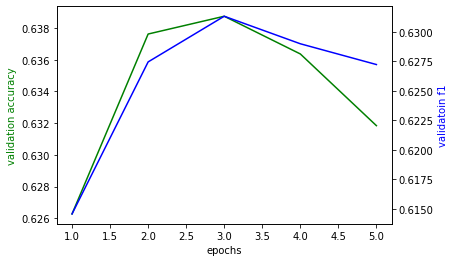

In [81]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(eval_epochs, eval_acc, 'g-')
ax2.plot(eval_epochs, eval_f1, 'b-')

ax1.set_xlabel('epochs')
ax1.set_ylabel('validation accuracy', color='g')
ax2.set_ylabel('validatoin f1', color='b')

plt.show()

#### [BERT - experiments]  
2. Finetuning vs other methods  
After doing my own training, I discussed the assignment with other lab mates and found out that they used some other methods that yielded better performance:
- **Balanced lables**
    - Since the labels in the training data is not balanced at all and we don't know the label distribution in the test data, balancing the number of data entries for each category/label seem to be a good idea and indeed yielded better results than I did (ranked 6 on the leaderboard)
- **Training a classifier with a linear layer, using BERT sequence embedings as features**
    - I did not know of this method before, but this method also has better performance on the test data (ranked 7)
- **Training on T5**
    - This is a newer model by Google that was proposed in 2020. The member that used this model is ranked 12 on the leaderboard.
- **Training on RoBERTa-large**
    - This method is ranked number 1 on the leaderboard. 
    - I don't know the specifics, since I only heard of this method from a lab member, who heard it from another friend of hers in another lab. 
    - There could be other details that I'm missing but one possible reason for the improvement is obviously the larger model and improved architecture. (From experiemce, RoBERTa also yielded better results in other tasks when compared to BERT-base)
Again, since this is a competition, it is not really possible or polite to ask for specifics. I'm sure there are many nitty-gritty details such as how to preprocess the data, how to classify the results, tweaking the hyperparameters, etc. that could improve the restuls. I guess I could only ask about these after the competition is over. 

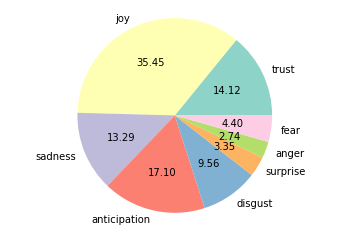

In [100]:
import matplotlib.cm as colormaps
cmap = colormaps.get_cmap("Set3")

counts = Counter(y_train)
labels = counts.keys()
sizes = [counts[l] for l in Counter(y_train).keys()]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%.2f', colors=cmap.colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Other methods
- Non-deep learning methods such as Naive-Bayes, Decision Tree have a decent performance -- scoreing around 0.4~0.5, which is higher than random guessing (0.125 if the labels are balanced), but their performance dim when compared to BERT. Some possible reasons:
    - BERT creates better feature representation: tweets are better represented by BERT, which is understandable, considering BOW only considers word frequency, whereas BERT considers word order/position, as well as pays "attention" to more important words and is able to look backwards and forwards during training (the "bi"directional part of BERT), which would all contribute to better sentence understanding. 
    - During finetuning, BERT also has the opportunity to "learn from its mistakes", i.e. look at what it did wrong with the loss function, which Naive-Bayes and Decision Tree both do not do.
- Compared to the default BOW features from `scikit-learn`, BOW500 has a worse performance, which is reasonable considering the smaller feature size (500) than default BOW (375841).

### Conclusions and future work
- For classifying tweet emotions, several methods are experimented with, including Naive Bayes and Decision Tree with bag-of-words embedding, a deep learning model from SemEval2018, and a finetuned BERT. BERT performs the best, theough there is still possible room for improvement.
- There are still combinations of methods I haven't experimented wiht, including BERT embeddings+NB classifier, which may be implemented in the future to see its effects.
- Error analysis on the results from BERT might also be helpful, e.g. seeing which kinds of mistakes it tends to make, and adding some other classificatio after BERT to mitigate them.
- I abandoned the SemEval2018 method pretty early on, but it might be informative to go back and investigate whether I've done something wrong when modifying their source code to cause such a low score.
- The SemEval2018 paper was published before BERT, and although it did employ self-attention mechanism, it uses an entirely different architecture than Attention Is All You Need (Vaswani et al, 2017). Possible bugs in the code notwithstanding, it's interesting to see the stark difference in training time and performance between their method and BERT.
- I have found other resources that look promising, for example [BERTweet](https://huggingface.co/docs/transformers/model_doc/bertweet), a BERT model that is pretrained on a 80 GB dataset of English tweets and specialises on tasks related to tweets. However due to the time limit I did not get to test it. 